# 4.10
二维4结点等参元，
在x,y坐标中单元各边与坐标轴x,y平行，
边长为a,b，
确定下列载荷情况下的结点载荷。

In [1]:
import sympy
import finite_element
from sympy import *
from sympy.abc import *
sympy.init_printing()

求位移插值函数

In [2]:
surface_exclude = finite_element.interpolation.SurfaceExclude([xi, eta])
surface_exclude.add_surface(xi + 1)
surface_exclude.add_surface(xi - 1)
surface_exclude.add_surface(eta + 1)
surface_exclude.add_surface(eta - 1)
coordinates = [
    (1,1), (-1,1), (-1,-1), (1,-1),
]
serendipity = finite_element.interpolation.Serendipity([xi, eta])
[serendipity.add_formula(surface_exclude.get_interpolation_function(coordinate), coordinate)
 for coordinate in coordinates]
interpolation_functions = [Matrix([[1,0],[0,1]])*f for f in serendipity.formulas]
interpolation_functions = Matrix(interpolation_functions)
interpolation_functions.T

⎡(η + 1)⋅(ξ + 1)                   -(η + 1)⋅(ξ - 1)                      (η - 
⎢───────────────         0         ─────────────────          0          ─────
⎢       4                                  4                                  
⎢                                                                             
⎢                 (η + 1)⋅(ξ + 1)                     -(η + 1)⋅(ξ - 1)        
⎢       0         ───────────────          0          ─────────────────       
⎣                        4                                    4               

1)⋅(ξ - 1)                   -(η - 1)⋅(ξ + 1)                    ⎤
──────────         0         ─────────────────          0        ⎥
  4                                  4                           ⎥
                                                                 ⎥
            (η - 1)⋅(ξ - 1)                     -(η - 1)⋅(ξ + 1) ⎥
  0         ───────────────          0          ─────────────────⎥
                   4                        

In [3]:
global_coordinates = [
    (a/2, b/2),
    (-a/2, b/2),
    (-a/2, -b/2),
    (a/2, -b/2),
]
Matrix(global_coordinates).T

⎡a  -a   -a    a ⎤
⎢─  ───  ───   ─ ⎥
⎢2   2    2    2 ⎥
⎢                ⎥
⎢b   b   -b   -b ⎥
⎢─   ─   ───  ───⎥
⎣2   2    2    2 ⎦

计算等参元坐标插值函数

In [4]:
isoparametric = finite_element.interpolation.Isoparametric(
    local_axises=[xi,eta],
    global_axises=[x,y],
    interpolation_functions=serendipity.formulas,
    coordinates=global_coordinates,
)
x, y = isoparametric.coordinate_interpolation_functions
z = zeta
x, y, z

In [5]:
b0 = Symbol('b_0')
q0 = Symbol('q_0')

计算$jacobian$和$A$两个变换矩阵。

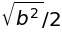

In [6]:
A = sqrt(
    (y.diff(eta) * z.diff(zeta) - y.diff(zeta) * z.diff(eta)) ** 2 +
    (z.diff(eta) * x.diff(zeta) - z.diff(zeta) * x.diff(eta)) ** 2 +
    (x.diff(eta) * y.diff(zeta) - x.diff(zeta) * y.diff(eta)) ** 2
)
A

In [7]:
jacobian = Matrix([
    [x.diff(xi), y.diff(xi), z.diff(xi)],
    [x.diff(eta), y.diff(eta), z.diff(eta)],
    [x.diff(zeta), y.diff(zeta), z.diff(zeta)],    
]).det()
jacobian

手动调整一下A的值。

In [8]:
A = b / 2
A

## 情况1
在x正方向有一分布载荷作用在$\xi=1$的边上，载荷在$\eta=-1$为0，在$\eta=1$为$q_0$，呈线性变化。

荷载

In [9]:
load = Matrix([q0/2+q0*eta/2,0])
load.T

⎡η⋅q₀   q₀   ⎤
⎢──── + ──  0⎥
⎣ 2     2    ⎦

积分

In [10]:
integrate(interpolation_functions * load * A, (eta, -1, 1)).subs({xi: 1}).T

⎡b⋅q₀                 b⋅q₀   ⎤
⎢────  0  0  0  0  0  ────  0⎥
⎣ 3                    6     ⎦

## 情况2

在$\xi=1$边上作用有均布载荷$q_0$，方向压向单元。

In [11]:
load = Matrix([-q0, 0])
load.T

[-q₀  0]

In [12]:
integrate(interpolation_functions * load * A, (eta, -1, 1)).subs({xi: 1}).T

⎡-b⋅q₀                  -b⋅q₀    ⎤
⎢──────  0  0  0  0  0  ──────  0⎥
⎣  2                      2      ⎦

## 情况3

在$y$正方向作用有均布的体积力$b_0$。

In [15]:
load = Matrix([0, b0])
load.T

[0  b₀]

In [14]:
integrate(integrate(interpolation_functions * load * jacobian, (eta, -1, 1)), (xi, -1, 1)).T

⎡   a⋅b⋅b₀     a⋅b⋅b₀     a⋅b⋅b₀     a⋅b⋅b₀⎤
⎢0  ──────  0  ──────  0  ──────  0  ──────⎥
⎣     4          4          4          4   ⎦